# Python Portfolio Project of Data Analytics Course by CourseCareers

## Step 1:

Use seaborn.load_dataset https://seaborn.pydata.org/generated/seaborn.load_dataset.html to load the mpg (miles per gallon, a measure of fuel economy) data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mpg_df = sns.load_dataset('mpg')
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# check for duplicates
mpg_df.duplicated().values.any()

np.False_

In [5]:
# check for missing values
mpg_df.isna().values.any()

np.True_

In [6]:
# check for statistical summaries
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
# `horsepower` column has 6 null values

mpg_df[mpg_df.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


## Step 2:

Create a visual showing the relationship between horsepower and fuel economy.

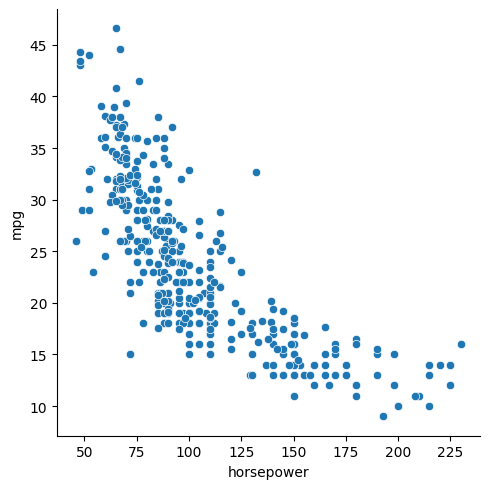

In [9]:
sns.relplot(
    data=mpg_df,
    x='horsepower', y='mpg',
    kind='scatter'
)

### Insights from the scatter plot between horsepower and fuel economy:

- The scatter plot shows a negative correlation between `mpg` and `horsepower`. This means that as `horsepower` increases (indicating more powerful engines), `mpg` tends to decrease.
- The data points are somewhat clustered, suggesting that there might be groups of cars with similar `horsepower` and `mpg` values.
- A few outliers can be observed, particularly  at higher `horsepower` values, where there are some data points with relative high `mpg`. They could represent cars with particularly efficient engines or specific driving conditions.

### Conclusion:
- Cars with higher `horsepower` generally have lower `mpg` (fuel efficiency). This is likely due to the increased energy required to propel heavier vehicles with more powerful engines.
- There are some variations within this general trend. Certain cars, possibly due to factors like engine design, weight reduction, or driving habits, might be more efficient than expected for their horsepower.

## Step 3:

Create a table summarizing fuel economy by country of origin.

In [10]:
mpg_df.groupby(by=['origin']).agg({'mpg': ['mean', 'std']}).reset_index()

origin        mpg          
                mean       std
0  europe  27.891429  6.723930
1   japan  30.450633  6.090048
2     usa  20.083534  6.402892

`std` or Standard Deviation measures the spreads of variability of `mpg` values around the mean. Small `std` value indicates that the `mpg` values are close to the mean, while a large `std` indicates more spread out values.

### Insights from the table:

The table provides a summary of fuel economy (`mpg`) for cars from `europe`, `japan` and `usa`. It includes the `mean mpg` and `standard deviation` for each origin.

Mean MPG:
- Japan has the highest average fuel economy (30.45 mpg)
- Europe has the second-highest average fuel economy (27.89 mpg)
- The USA has the lowest average fuel economy (20.08 mpg)

Standard Deviation:
- The standard deviation for Japan is the lowest (6.09), indicating less variation in `mpg` values among Japanese cars.
- The standard deviation for Europe is the highest (6.72), suggesting more variation in `mpg` values amount Europe cars.
- The USA's standard deviation falls between Japan and Europe (6.40)

### Conclusion:
- Japanese cars generally have the highest fuel efficiency compared to European and US cars.
- There is less variation in fuel efficiency among Japanese cars compared to European and US cars.
- European cars exhibit the most variation in fuel efficiency. 

## Step 4:

Create a visual showing how fuel economy has changed over time.

In [11]:
mpg_overtime_df = mpg_df.groupby(by='model_year').agg({'mpg': 'mean'}).reset_index()
mpg_overtime_df

,model_year,mpg
0,70,17.689655
1,71,21.250000
2,72,18.714286
3,73,17.100000
4,74,22.703704
5,75,20.266667
6,76,21.573529
7,77,23.375000
8,78,24.061111
9,79,25.093103


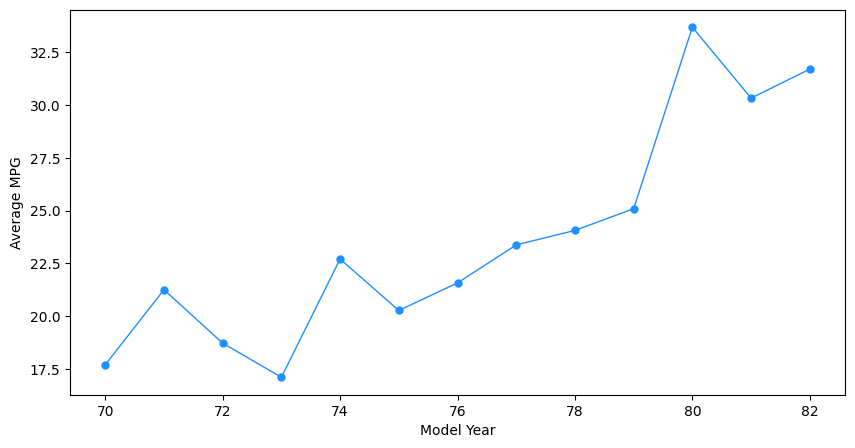

In [12]:
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(
    mpg_overtime_df.model_year,
    mpg_overtime_df.mpg,
    marker='.', markersize=10,
    linestyle='-', linewidth=1,
    color='dodgerblue'
)
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.show()

Based on the graph, we can observe a general upward trend in fuel economy (`mpg`) over the years. This indicates that vehicles produced in later model years tend to be more fuel-efficient than those produced in earlier years.

### Insights from the fuel economy trend over time:

- Initial increase and heavy dip: There is a noticeable increase in `mpg` from model year 70 to 71, then it continues to decrease until year 73, where the average `mpg` value is even lower than that of the earlier years.
- Slight dip: Fuel economy appears to have dipped slightly between year 74 to 75 after a great increase from 73 to 74.
- Steady improvement: From model year 75 onward, there's a consistent upward trend in `mpg`, with a particularly significant increase between model year 79 and 80.

### Possible factors contributing to the trend:

- Technological advancements: Improvements in engine design, transmission technology, and vehicle aerodynamics have played a crucial role in enhancing fuel efficiency.
- Government regulations: Fuel economy standards and regulations implemented by governments have incentivized automakers to produce more efficient vehicles.
- Consumer demand: Increasing consumer awareness and preference for fuel-efficient vehicles have driven automakers to prioritize fuel economy in their designs.

## Step 5:

Create other visuals or tables related to fuel economy.

### Create a histogram to visualize the distribution of mpg

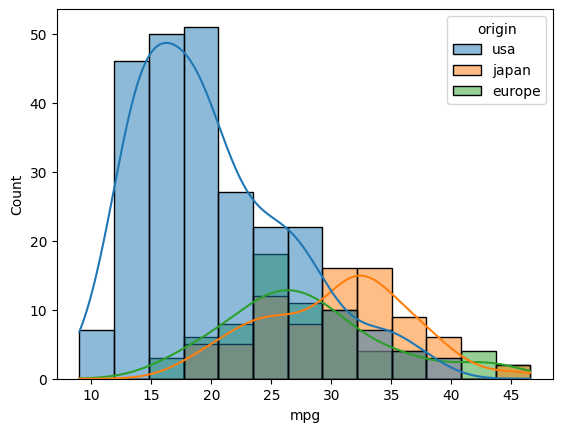

In [13]:
sns.histplot(
    data=mpg_df, 
    x='mpg',
    hue='origin',
    kde=True
)
plt.show()

The graph shows a histogram with a kernel density estimate (kde) plot overlaid, visualizing the distribution of `mpg` for cars categorized by their `origin` (usa, japan, europe).

#### Insights from the distribution of mpg:

- Overall distribution: The overall distribution of `mpg` is skewed to the right, with a longer tail on the higher `mpg` side. This indicates that there are moore cars with lower `mpg` compared to higher `mpg`.
- Distribution by `origin`:
    - USA: the distribution for US cars is centered around the mid-range `mpg` values, with a moderate spread.
    - Japan: Japanese cars tend to have higher `mpg` values, as evidenced by the distribution being shifted towards the right. The spread is also relatively narrow.
    - Europe: European cars show a similar distribution to US cars, with a slight shift towards higher `mpg` values. However, the spread is slightly wider.
- KDE plots: The KDE plots provide a smooth estimate of the probability density function for each `origin`. They help visualize the shape of the distributions more clearly.
- Comparison:
    - Japanese cars generally have higher `mpg` compared to US and European cars.
    - The distributions for US and European cars are relatively similar, with slight variations in the center and spread.

#### Conclusion:
The histogram and KDE plots reveal that the distribution of `mpg` varies among cars from different origins. Japanese cars tend to have higher `mpg` compared to US and European cars, while the distributions for US and European cars are somewhat similar.

### Create a kde plot to visualize the distribution of mpg independently for each origin 

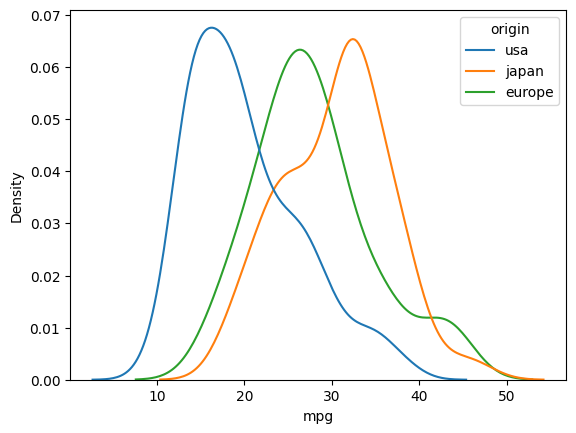

In [14]:
sns.kdeplot(
    data=mpg_df,
    x='mpg',
    hue='origin',
    common_norm=False
)
plt.show()

#### Insights from the distribution of mpg independently for each origin:

- Independent density estimation: Each KDE curve represents the probability density of `mpg` for a specific `origin`, normalized independently. This means that the curves do not share a common scale, allowing for a clearer comparison of the relative densities.
- Distribution overlap: There is a significant overlap between the KDE curves for US and European cars, suggesting that their `mpg` distributions are quite similar.
- Distinct Japanese distribution: the KDE curve for Japanese cars is noticeably shifted to the right, indicating that they generally have higher `mpg` values compared to US and European cars.
- Peak locations: The peak of the Japanese curve is located at a higher `mpg` value than the peaks of the US and European curves, futher emphasizing the difference in `mpg` distributions.

#### Conclusion:
While the overall shapes of the distributions for US and European cars are similar, the Japanese distribution is distinct, demonstrating a clear preference for higher `mpg` values. This analysis provides valuable insights into the `mpg` characteristics of cars from different origins.

### Create a box plot to visualize the distribution of mpg by origin

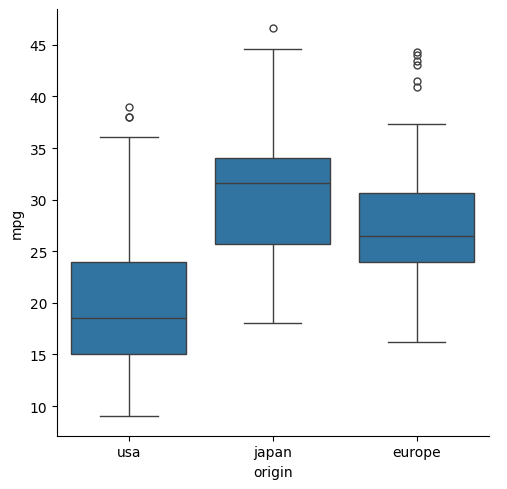

In [15]:
sns.catplot(
    data=mpg_df,
    x='origin', y='mpg',
    kind='box'
)

The box plot illustrates the distribution of `mpg` for cars from the origins `usa`, `japan` and `europe`.

- Median: The middle line within each box represents the median `mpg` for that origin.
- Interquartile range (IQR): The box itself represents the IQR, which is the range between the 25th and 75th percentiles.
- WHiskers: The lines extending from the boxes are the whiskers, which typically show the minimum and maximum values excluding outliers.
- Outliers: Individual points plotted outside the whiskers are potential outliers.

#### Insights from the distribution of mpg by origin:

- Median `mpg`:
    - USA: The median `mpg` for US cars appears to be slightly lower than the other two origins. The median moves low to the bottom of the IQR.
    - Japan: Japanese cars have the highest median `mpg`. The median moves high to the top of the IQR
    - Europe: European cars have a median `mpg` that falls between the US and Japanese cars. The median moves low to the bottom of the IQR.
- IQR:
    - USA: The IQR for US cars is relatively wide, indicating a larger spread of `mpg` values.
    - Japan: Japanese cars have a narrower IQR, suggesting a more consistent `mpg` distribution.
    - Europe: European cars have an IQR than falls between the US and Japan.
- Outliers:
    - There are a few outliers visible in the plot, particularly for the US and Japan. These might represent cars with unusually high or low `mpg` values.


#### Conclusion:
- Japan: Japanese cars generally have higher `mpg` values and a more consistent distribution compared to US and European cars. Japanese cars tend to have better fuel efficiency compared to US and European cars.
- USA: US cars have a wider range of `mpg` values, with some cars having significantly lower `mpg` than others.
- Europe: European cars fall somewhere in between US and Japanese cars in terms of `mpg` and distribution.
- It's possible that Japanese car manufacturers have made significant advancements in fuel efficiency technology, leading to higher overall `mpg` for their vehicles. This could explain why the median has shifted upwards towards the top of the IQR.
- The downward shift of medians in USA and European might indicate a less pronounced focus on fuel efficiency or a mix of factors such as larger vehicle sizes, different driving habits, and varying fuel standards.